In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../datasets/tumor_attributes/primary-tumor.data',header=None, keep_default_na=False, na_values=['?'])
#df=df.replace('?',np.nan)
df=df.fillna(0)

In [ ]:
df_=df[df.loc[:,0].isin([1,4])]

X=df.loc[:,1:].values.astype(int)
y=df.loc[:,0].values

X_=df_.loc[:,1:].values.astype(int)
y_=df_.loc[:,0].values



In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clfd=DecisionTreeClassifier(max_depth=None, min_samples_split=2,class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clfd.fit(X_train,y_train)
y_pred=clfd.predict(X_test)
print('DEC: ',accuracy_score(y_test, y_pred, normalize=True))

clf=RandomForestClassifier(max_depth=None, min_samples_split=2,class_weight='balanced',n_estimators=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('RF : ',accuracy_score(y_test, y_pred, normalize=True))


clf=ExtraTreesClassifier(max_depth=None, min_samples_split=2,class_weight='balanced',n_estimators=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('EXT: ',accuracy_score(y_test, y_pred, normalize=True))

clf=AdaBoostClassifier(n_estimators=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('ADA: ',accuracy_score(y_test, y_pred, normalize=True))

clf=GradientBoostingClassifier(max_depth=None, n_estimators=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('GBM: ',accuracy_score(y_test, y_pred, normalize=True))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

M=2

clfd=DecisionTreeClassifier(max_depth=M, min_samples_split=2,class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)


clfd.fit(X_train,y_train)
y_pred=clfd.predict(X_test)
print('DEC: ',accuracy_score(y_test, y_pred, normalize=True))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

M=3

clfd_=DecisionTreeClassifier(max_depth=M, min_samples_split=2,class_weight='balanced')
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=.5)


clfd_.fit(X_train_,y_train_)
y_pred_=clfd_.predict(X_test_)
print('DEC: ',accuracy_score(y_test_, y_pred_, normalize=True))


In [ ]:
X_.shape

In [ ]:
X_test_.shape

In [ ]:
'''
    class: lung, head & neck, esophasus, thyroid, stomach, duoden & sm.int,
              colon, rectum, anus, salivary glands, pancreas, gallblader,
              liver, kidney, bladder, testis, prostate, ovary, corpus uteri, 
              cervix uteri, vagina, breast
    2. age:   <30, 30-59, >=60
    3. sex:   male, female
    4. histologic-type: epidermoid, adeno, anaplastic
    5. degree-of-diffe: well, fairly, poorly
    6. bone: yes, no
    7. bone-marrow: yes, no
    8. lung: yes, no
    9. pleura: yes, no
   10. peritoneum: yes, no
   11. liver: yes, no
   12. brain: yes, no
   13. skin: yes, no
   14. neck: yes, no
   15. supraclavicular: yes, no
   16. axillar: yes, no
   17. mediastinum: yes, no
   18. abdominal: yes, no
'''

classnames=['lung, head & neck', 'esophasus', 'thyroid', 'stomach', 'duoden & sm.int',
              'colon', 'rectum', 'anus', 'salivary glands', 'pancreas', 'gallblader',
              'liver', 'kidney', 'bladder', 'testis', 'prostate', 'ovary', 'corpus uteri', 
              'cervix uteri', 'vagina', 'breast']
featurenames=['age','sex','histology','differentiation','bone','bone marrow','lung','pleura',
              'peritoeum','liver','brain','skin','neck','supraclavicular','axillar','mediastinum','abdominal']


classnames_=classnames[:4]
print(len(featurenames),len(classnames),len(classnames_))

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clfd_, out_file='tree.dot', max_depth=M,
                        feature_names = featurenames,
                        class_names = classnames_,
                        rounded = True, proportion = True, 
                        precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree'+str(M)+'.png', '-Gdpi=600'])

In [ ]:
from IPython.display import Image
Image(filename = 'tree'+str(M)+'.png', width=900, unconfined=True) 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pylab as plt

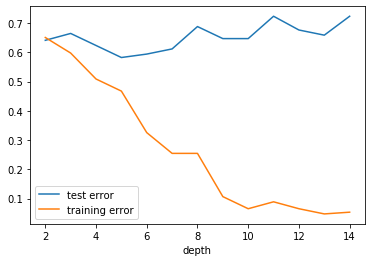

In [31]:
Result=[]
C=np.arange(1,23)
df_=df[df.loc[:,0].isin(C)]

X_=df_.loc[:,1:].values.astype(int)
y_=df_.loc[:,0].values

for M in np.arange(2,15):
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=.5)
    clfd_=DecisionTreeClassifier(max_depth=M)

    clfd_.fit(X_train_,y_train_)
    y_pred_in=clfd_.predict(X_train_)
    y_pred=clfd_.predict(X_test_)
    #print(y_pred)
    [ins,oos]=[1-accuracy_score(y_test_, y_pred, normalize=True),1-accuracy_score(y_train_, y_pred_in, normalize=True)]
    Result=Result+[M,ins,oos]
Result=pd.DataFrame(np.array(Result).reshape(int(len(Result)/3),3))
#plt.plot(Result[:,0],Result[:,1])
#plt.plot(Result[:,0],Result[:,2])
Result.columns=['depth','test error','training error']
Result=Result.set_index('depth')
Result.plot()

In [15]:
int(len(Result)/3)

48

In [ ]:


from sklearn.tree import export_graphviz
export_graphviz(clfd_, out_file='tree.dot', max_depth=M,
                        feature_names = featurenames,
                        class_names = classnames_,
                        rounded = True, proportion = True, 
                        precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree'+str(M)+'.png', '-Gdpi=600'])